In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_data(data_path):
    raw_data = pd.read_csv(data_path, sep='\t', header=None)
    raw_data.columns = [str(col+1) for col in raw_data.columns]
    return raw_data


In [3]:
class DataVisualizer:
    def __init__(self,target):
        self.target = target

    def read_data(self):
        self.raw_data = pd.read_csv(self.data_path, sep='\t', header=None)
        self.raw_data.columns = [str(col+1) for col in self.raw_data.columns]
        print(self.raw_data.columns)

        return self

    def str_col_visualize(self,data):
        print("string columns are ", data.columns)

        y_data = self.raw_data[self.target]
        for col in data.columns:
            x_data = data[col]


    def num_col_visualize(self,data):
        print("numerical columns are ", data.columns)

In [4]:
data_path = 'lezhin_dataset_v2_training.tsv'
raw_data = read_data(data_path)
data_visualizer = DataVisualizer(target = '1')

In [5]:
platform = raw_data.iloc[:,1:5] # onehot encoding
ratio = platform.sum().apply(lambda x: x/ len(platform))

print("platform ratio \n", ratio)

platform ratio 
 2    0.137938
3    0.295491
4    0.166018
5    0.400553
dtype: float64


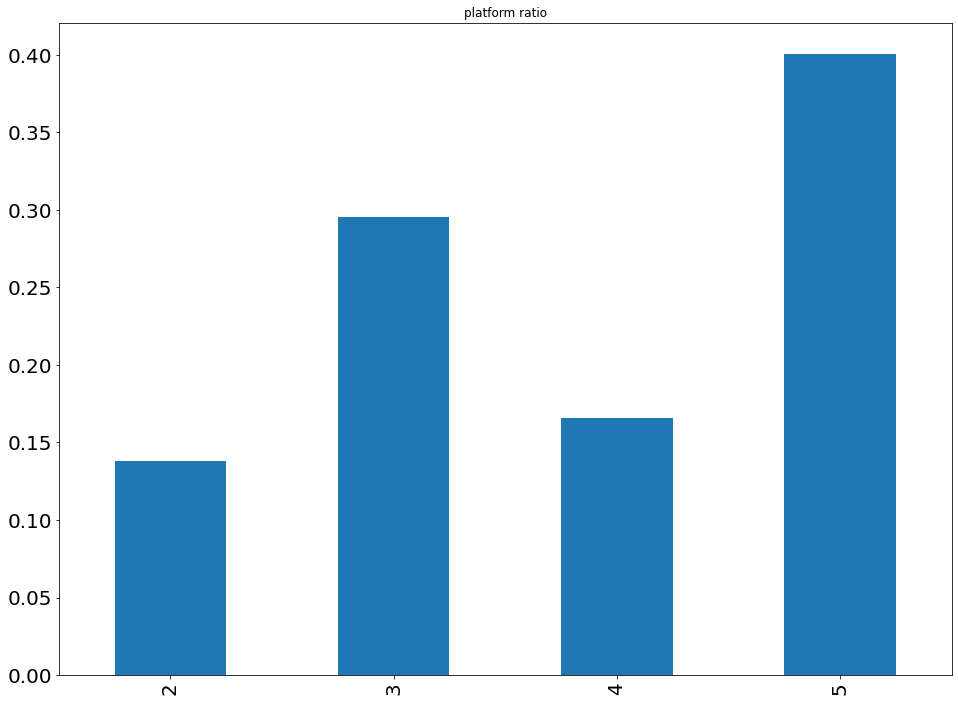

In [6]:
fig = ratio.plot(kind = 'bar', figsize=(16,12),fontsize=20,title = 'platform ratio').get_figure()
fig.savefig('./platform_ratio.png')

In [52]:
total_session = raw_data.iloc[:,[0,5]]
total_session
yes_purchase = total_session[total_session['1'] == 1]['6']
no_purchase = total_session[total_session['1'] == 0]['6']

print(yes_purchase.describe())
print(no_purchase.describe())
# standardization would work

count    221793.000000
mean        124.144031
std         156.246708
min           1.000000
25%          22.000000
50%          72.000000
75%         168.000000
max        3147.000000
Name: 6, dtype: float64
count    429172.000000
mean        108.651671
std         135.495782
min           1.000000
25%          24.000000
50%          64.000000
75%         144.000000
max        6807.000000
Name: 6, dtype: float64


In [7]:
total_session = total_session.apply(lambda x: (x - total_session.min())/ (total_session.max() - total_session.min()))
fig = total_session.plot(kind = 'bar', figsize=(16,12),fontsize=20,title = 'total_session ratio').get_figure() 

NameError: name 'vins' is not defined

<AxesSubplot:>

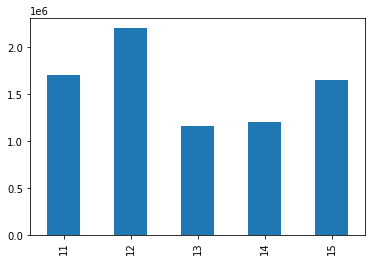

In [18]:
purchase_item = raw_data.iloc[:,10:111] 

In [63]:
purchase_item.describe()

,11,12,13,14,15,16,17,18,19,20,...,102,103,104,105,106,107,108,109,110,111
count,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,...,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000,650965.000000
mean,2.623407,3.390589,1.788067,1.853582,2.531368,2.345470,1.798433,2.209683,1.163923,3.514155,...,0.488585,0.570037,0.836793,0.398333,0.873437,0.606904,0.958864,0.934864,0.518435,0.376492
std,8.605020,8.478400,9.678996,9.759512,7.790864,7.554764,7.995130,12.059852,5.409965,10.807668,...,1.884713,6.436829,3.545893,2.023058,5.791985,7.501318,5.213754,6.172054,3.323230,0.484506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,47.000000,37.000000,93.000000,75.000000,40.000000,38.000000,53.000000,125.000000,54.000000,52.000000,...,12.000000,94.000000,21.000000,13.000000,89.000000,185.000000,48.000000,69.000000,32.000000,1.000000


In [66]:
purchase_item['max'] = purchase_item.max(axis=1)

In [71]:
purchase_item['max'].mean

<bound method Series.mean of 0         18
1          1
2         25
3         34
4         34
5          5
6         31
7         52
8          0
9         28
10         1
11        55
12        35
13        37
14        24
15        43
16         7
17        12
18        49
19         0
20        29
21         9
22         9
23        44
24        74
25         1
26        16
27        94
28         6
29        47
          ..
650935    26
650936    24
650937    86
650938    27
650939    17
650940    34
650941    34
650942    65
650943    16
650944    47
650945    67
650946     1
650947    21
650948    65
650949    65
650950    65
650951    22
650952    22
650953    22
650954    86
650955    86
650956    86
650957    38
650958    71
650959    71
650960    24
650961    35
650962    55
650963    55
650964    55
Name: max, Length: 650965, dtype: int64>

In [72]:
raw_data['11']

0          0
1          0
2          0
3          0
4          0
5          3
6          5
7          0
8          0
9          0
10         0
11        42
12         0
13        37
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         6
22         0
23         0
24        44
25         0
26        16
27        11
28         0
29         4
          ..
650935     0
650936     0
650937     0
650938     0
650939     0
650940     0
650941     0
650942     0
650943     0
650944    14
650945    11
650946     0
650947     0
650948     0
650949     0
650950     0
650951     0
650952     0
650953     0
650954     0
650955     0
650956     0
650957     0
650958     0
650959     0
650960     0
650961     0
650962     0
650963     0
650964     0
Name: 11, Length: 650965, dtype: int64

In [81]:
raw_data.iloc[:,113:123].sum(axis=0)

114    67120
115    62017
116    87714
117    67548
118    66626
119    58734
120    79912
121    93935
122     1012
123      269
dtype: int64

In [85]:
raw_data['142'].value_counts()

19    479004
18     46478
17     29524
16     25366
13     13280
14     12665
15     11848
12      7491
10      6656
9       4869
11      3245
6       2557
7       2486
8       2065
4       1784
5        800
2        576
3        271
Name: 142, dtype: int64

In [87]:
raw_data['143'].value_counts()

0    571832
1     79133
Name: 143, dtype: int64

In [89]:
raw_data.iloc[:,151:167].describe()

,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167
count,102029.000000,463076.000000,377948.000000,84452.000000,419734.000000,205460.000000,622.000000,344146.00000,108261.000000,293.000000,986.000000,8040.000000,559911.000000,374738.000000,76.000000,62.000000
mean,0.141066,0.470041,0.334122,0.026826,0.067606,0.119996,0.018274,0.16742,0.045149,0.005695,0.034337,0.034287,0.212558,0.089212,0.004322,0.060239
std,0.173552,0.238670,0.235396,0.060796,0.068174,0.140529,0.039185,0.17808,0.082326,0.011845,0.078217,0.077805,0.218328,0.099790,0.005277,0.083274
min,0.000600,0.003100,0.000100,0.000200,0.000100,0.000000,0.001200,0.00000,0.000100,0.000000,0.000700,0.000100,0.000000,0.000000,0.000000,0.015100
25%,0.019400,0.293300,0.120700,0.003500,0.026200,0.020000,0.003600,0.02860,0.006400,0.000800,0.004600,0.005200,0.050200,0.017800,0.000000,0.038400
50%,0.061700,0.442000,0.324700,0.009100,0.052300,0.061800,0.009400,0.09220,0.015100,0.003200,0.011700,0.010500,0.119500,0.048500,0.000200,0.041300
75%,0.193700,0.652900,0.518500,0.023800,0.082400,0.169700,0.016400,0.25150,0.046200,0.006000,0.028300,0.027100,0.307000,0.127600,0.008500,0.041300
max,0.796700,0.990900,0.970400,0.802900,0.796700,0.786800,0.388300,0.82210,0.887000,0.164200,0.578300,0.730400,0.954500,0.698700,0.016300,0.421700
